In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
import seaborn as sns

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
data = pd.read_csv('labeled_data.csv')

In [6]:
 # Lista todas las GPUs disponibles
gpus = tf.config.list_physical_devices('GPU')

if gpus:
    try:
        # Especifica una GPU particular (por índice, comenzando en 0)
        tf.config.set_visible_devices(gpus[0], 'GPU')  # Cambia "0" por el índice de la GPU que deseas usar

        # Opcional: Configura la memoria de la GPU para que sea limitada o dinámica
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)

        print("GPU configurada correctamente:", gpus[0])
    except RuntimeError as e:
        # Errores ocurren si el dispositivo ya ha sido inicializado
        print("Error al configurar la GPU:", e)
else:
    print("No hay GPUs disponibles.")

No hay GPUs disponibles.


In [7]:
# Confirmar si TensorFlow está usando la GPU
print("TensorFlow ejecutándose en GPU:", tf.config.list_physical_devices('GPU'))

TensorFlow ejecutándose en GPU: []


<div class="alert alert-block alert-danger">
<b>Atención!!!:</b> Estamos pasando el texto directamente a la red neuronal sin antes aplicar técnicas de stemming o lemmatizing.
</div>

In [8]:
# Tokenización y padding
tokenizer = Tokenizer(num_words=20000)

In [14]:
tokenizer

In [15]:
tokenizer.word_index

{'a': 1,
 'bitch': 2,
 'i': 3,
 'rt': 4,
 'the': 5,
 'you': 6,
 'to': 7,
 'and': 8,
 'my': 9,
 'that': 10,
 '128514': 11,
 't': 12,
 'bitches': 13,
 'in': 14,
 'co': 15,
 'is': 16,
 'http': 17,
 'like': 18,
 'me': 19,
 'of': 20,
 'on': 21,
 'hoes': 22,
 'be': 23,
 'this': 24,
 'pussy': 25,
 'for': 26,
 'it': 27,
 'hoe': 28,
 'with': 29,
 '8220': 30,
 '8221': 31,
 "i'm": 32,
 'ass': 33,
 'your': 34,
 'all': 35,
 'up': 36,
 'if': 37,
 'but': 38,
 'just': 39,
 "don't": 40,
 'get': 41,
 'fuck': 42,
 'so': 43,
 'they': 44,
 'no': 45,
 'when': 46,
 'these': 47,
 'u': 48,
 'shit': 49,
 'got': 50,
 '8230': 51,
 'nigga': 52,
 'not': 53,
 'she': 54,
 'was': 55,
 'trash': 56,
 'are': 57,
 'her': 58,
 'at': 59,
 'lol': 60,
 'out': 61,
 'have': 62,
 'amp': 63,
 'about': 64,
 'he': 65,
 "ain't": 66,
 'some': 67,
 'what': 68,
 'do': 69,
 'know': 70,
 'can': 71,
 'niggas': 72,
 'we': 73,
 'them': 74,
 'one': 75,
 'love': 76,
 'how': 77,
 "it's": 78,
 'or': 79,
 'who': 80,
 'as': 81,
 'go': 82,
 'fucki

In [16]:
len(tokenizer.word_index)

36508

In [17]:
tokenizer.word_counts

OrderedDict([('rt', 7647),
             ('mayasolovely', 1),
             ('as', 662),
             ('a', 9562),
             ('woman', 101),
             ('you', 6177),
             ("shouldn't", 27),
             ('complain', 28),
             ('about', 923),
             ('cleaning', 6),
             ('up', 1538),
             ('your', 1544),
             ('house', 132),
             ('amp', 930),
             ('man', 531),
             ('should', 220),
             ('always', 286),
             ('take', 298),
             ('the', 7251),
             ('trash', 1158),
             ('out', 1082),
             ('mleew17', 2),
             ('boy', 202),
             ('dats', 24),
             ('cold', 63),
             ('tyga', 22),
             ('dwn', 2),
             ('bad', 577),
             ('for', 2128),
             ('cuffin', 9),
             ('dat', 294),
             ('hoe', 1949),
             ('in', 3073),
             ('1st', 37),
             ('place', 68),
             (

In [33]:
tokenizer.fit_on_texts(data['tweet'])

In [34]:
sequences = tokenizer.texts_to_sequences(data['tweet'])

In [30]:
test_text = ['Hello my friend, what do you want to say?']
test_sequence = tokenizer.texts_to_sequences(test_text)

In [31]:
print(test_sequence)

[[1759, 9, 528, 68, 69, 6, 87, 7, 100]]


In [35]:
sequences

[[4,
  13289,
  81,
  1,
  420,
  6,
  1190,
  1148,
  64,
  3918,
  36,
  34,
  320,
  63,
  81,
  1,
  95,
  6,
  222,
  174,
  164,
  5,
  56,
  61],
 [4, 8679, 233, 1315, 620, 1410, 8680, 88, 26, 2873, 166, 28, 14, 5, 946, 579],
 [4,
  6615,
  842,
  4,
  1126,
  6,
  185,
  42,
  1,
  2,
  8,
  54,
  304,
  7,
  646,
  6,
  23,
  1127,
  81,
  49],
 [4, 513, 580, 6616, 3919, 1269, 54, 103, 18, 1, 766],
 [4,
  13290,
  5,
  49,
  6,
  587,
  64,
  19,
  357,
  23,
  562,
  79,
  27,
  357,
  23,
  6617,
  141,
  5,
  2,
  80,
  294,
  27,
  7,
  105,
  13291],
 [12,
  3920,
  827,
  5,
  49,
  39,
  3497,
  19,
  1024,
  6,
  43,
  1466,
  8,
  144,
  26,
  569,
  38,
  104,
  83,
  29,
  22,
  11,
  11,
  11],
 [6618,
  3,
  71,
  53,
  39,
  570,
  36,
  8,
  106,
  21,
  263,
  2,
  3,
  50,
  97,
  219,
  49,
  180,
  21],
 [30, 13292, 167, 32, 607, 20, 6, 199, 13, 555, 26, 254, 753, 181, 31],
 [63, 6, 357, 53, 41, 105, 2, 108, 63, 287, 10],
 [3498, 4517, 4518, 1467, 8681, 2],


In [36]:
# 280 es la longitud máxima de un tweet
X = pad_sequences(sequences, maxlen=280)

In [19]:
# Convertimos las categorías a vectores onehot encoding
y = pd.get_dummies(data['class']).values

In [20]:
# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X

array([[   0,    0,    0, ...,    5,   56,   61],
       [   0,    0,    0, ...,    5,  946,  579],
       [   0,    0,    0, ..., 1127,   81,   49],
       ...,
       [   0,    0,    0, ...,  383,   36,  307],
       [   0,    0,    0, ..., 2122,    6, 1495],
       [   0,    0,    0, ...,   17,   12,   15]])

In [22]:
X_train

array([[    0,     0,     0, ...,    20,   229,    51],
       [    0,     0,     0, ...,    39,    81,   342],
       [    0,     0,     0, ...,    11,  3168,   119],
       ...,
       [    0,     0,     0, ...,    12,    15, 14257],
       [    0,     0,     0, ...,   531,    80,    51],
       [    0,     0,     0, ...,   389,   862,   176]])

In [ ]:
# Creación del modelo LSTM simple
model = Sequential([
    Embedding(input_dim=20000, output_dim=128, input_length=100),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 clases
])

# Compilación del modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=1)


# Predicciones
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)


# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Hate Speech', 'Offensive', 'Neither'], 
            yticklabels=['Hate Speech', 'Offensive', 'Neither'])
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.title('Matriz de Confusión')
plt.show()

# Reporte de clasificación
report = classification_report(y_test_classes, y_pred_classes, target_names=['Hate Speech', 'Offensive', 'Neither'])
report

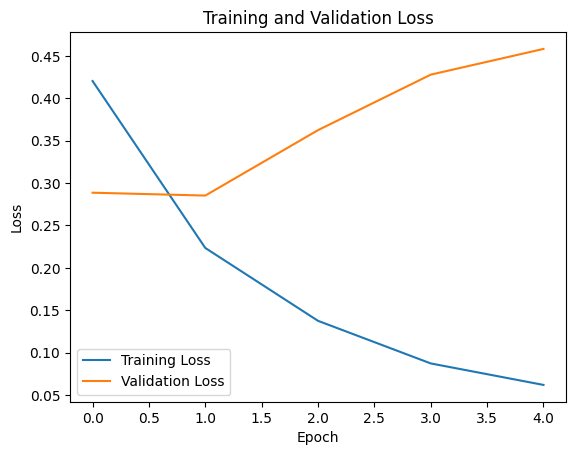

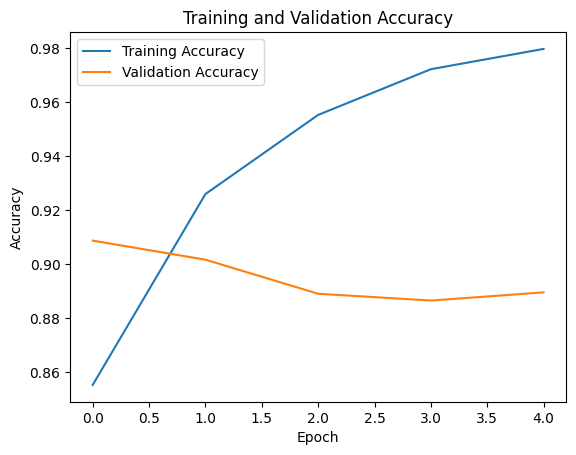

In [9]:
# Graficar la pérdida en el conjunto de entrenamiento y validación
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Graficar la precisión en el conjunto de entrenamiento y validación
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

Lo más probable es que sea debido a que haya pocos registros y una categoría esté sobrerepresentada, lo que genera problemas en el modelo.

In [10]:
from tensorflow.keras.models import save_model, load_model

In [11]:
# Función para guardar el modelo
def guardar_modelo(modelo, ruta_fichero):
    """
    Guarda un modelo entrenado en un archivo.

    Args:
    modelo (keras.Model): Modelo entrenado.
    ruta_fichero (str): Ruta donde se guardará el modelo.
    """
    modelo.save(ruta_fichero)
    print(f"Modelo guardado en: {ruta_fichero}")

In [12]:
# Función para cargar el modelo
def cargar_modelo(ruta_fichero):
    """
    Carga un modelo previamente guardado desde un archivo.

    Args:
    ruta_fichero (str): Ruta del archivo del modelo guardado.

    Returns:
    keras.Model: Modelo cargado.
    """
    modelo = load_model(ruta_fichero)
    print(f"Modelo cargado desde: {ruta_fichero}")
    return modelo

In [13]:
guardar_modelo(model, "RNNtwitterDataset.h5")

Modelo guardado en: RNNtwitterDataset.h5
